<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Download-das-bibliotecas" data-toc-modified-id="Download-das-bibliotecas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download das bibliotecas</a></span></li><li><span><a href="#Construção-do-Modelo" data-toc-modified-id="Construção-do-Modelo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Construção do Modelo</a></span></li><li><span><a href="#Otimização-dos-Parâmetros" data-toc-modified-id="Otimização-dos-Parâmetros-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Otimização dos Parâmetros</a></span></li><li><span><a href="#Quantificação-de-Incertezas" data-toc-modified-id="Quantificação-de-Incertezas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quantificação de Incertezas</a></span></li></ul></div>

## Download das bibliotecas

In [2]:
using Pkg
Pkg.activate("..")
Pkg.status()

Activating environment at `~/Documents/modelo-covid19/Project.toml`
    Status `~/Documents/modelo-covid19/Project.toml`
  [864edb3b] DataStructures v0.17.15
  [aae7a2af] DiffEqFlux v1.9.0
  [1130ab10] DiffEqParamEstim v1.14.0
  [41bf760c] DiffEqSensitivity v6.13.0
  [ef61062a] DiffEqUncertainty v1.4.1
  [0c46a032] DifferentialEquations v6.13.0
  [31c24e10] Distributions v0.21.12
  [587475ba] Flux v0.10.4
  [1b10255b] GlobalSensitivityAnalysis v0.0.10
  [429524aa] Optim v0.20.6
  [1dea7af3] OrdinaryDiffEq v5.35.5
  [65888b18] ParameterizedFunctions v5.3.0
  [438e738f] PyCall v1.91.4
  [d330b81b] PyPlot v2.9.0


In [3]:
include("../src/dados.jl");

In [4]:
include("../src/models.jl");

┌ Warning: Replacing module `ForwardDiff`
└ @ Base loading.jl:942


In [23]:
include("../src/graphs.jl");

In [6]:
include("../src/parametrization.jl");

In [7]:
include("../src/optimization.jl");

┌ Info: Precompiling DiffEqFlux [aae7a2af-3d4f-5e19-a356-7da93b79d9d0]
└ @ Base loading.jl:1273
┌ Warning: Module ForwardDiff with build ID 4612453959207 is missing from the cache.
│ This may mean ForwardDiff [f6369f11-7733-5829-9624-2563aa707210] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1011
┌ Warning: Module ForwardDiff with build ID 4612453959207 is missing from the cache.
│ This may mean ForwardDiff [f6369f11-7733-5829-9624-2563aa707210] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1011
┌ Info: Skipping precompilation since __precompile__(false). Importing DiffEqFlux [aae7a2af-3d4f-5e19-a356-7da93b79d9d0].
└ @ Base loading.jl:1028
┌ Info: Precompiling Tracker [9f7883ad-71c0-57eb-9f7f-b5c9e6d3789c]
└ @ Base loading.jl:1273
┌ Warning: Module ForwardDiff with build ID 4612453959207 is missing from the cache.
│ This may mean ForwardDiff [f6369f11-7733-5829-9624-2563aa707210] does not support

## Construção do Modelo

In [8]:
ts = 0.0:1.0:float(n_pts)
sol = model(params_rio_base, CI_Rio, ts);

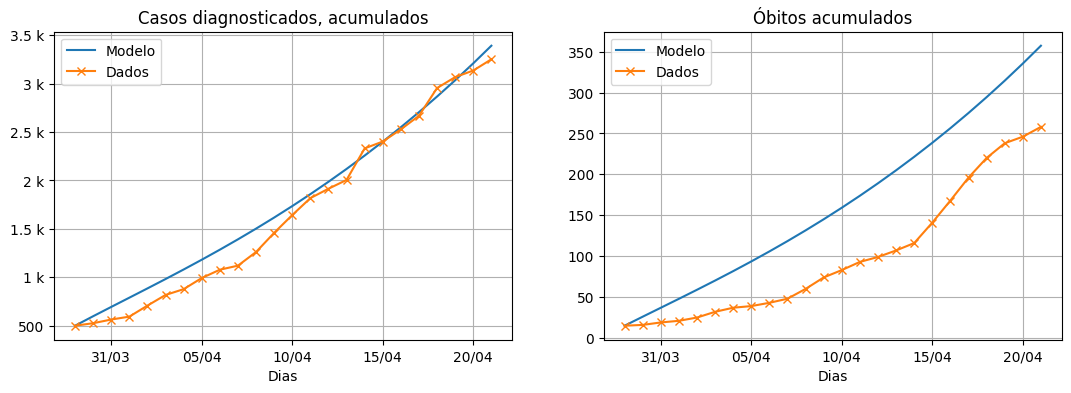

In [9]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [Rio_acc_d,Rio_acc_m]
series = [sol[9,:],sol[10,:]]
axs[1].set_title("Casos diagnosticados, acumulados")
axs[2].set_title("Óbitos acumulados")
for (ax,serie,data) in zip(axs,series,datas)
    graph_py.plot_accum(serie, data,real_data = true, ax = ax,blur = 1.0, cor_serie = "C0", cor_dados = "C1x-")
end

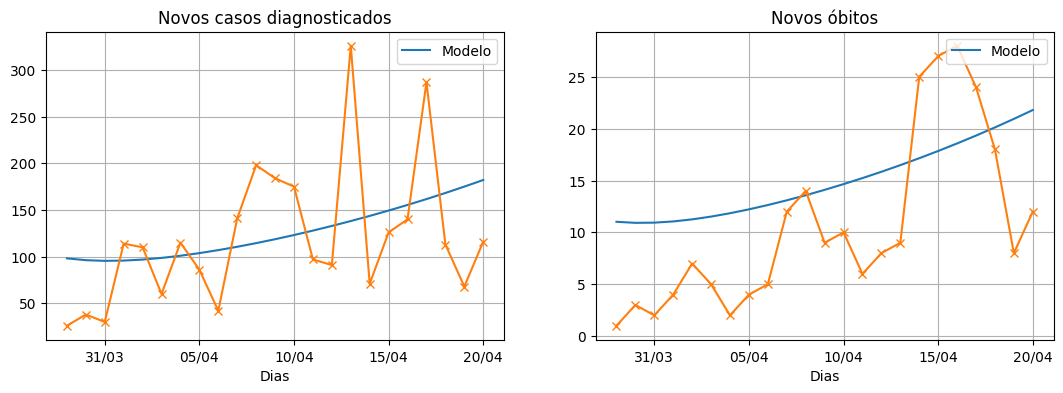

In [10]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [diagn_Rio,obitos_Rio]
series = [sol[9,:],sol[10,:]]
axs[1].set_title("Novos casos diagnosticados")
axs[2].set_title("Novos óbitos")
for (ax,serie,data) in zip(axs,series,datas)
    graph_py.plot_daily(serie, data,real_data = true, ax = ax, cor_serie = "C0", cor_dados = "C1x-")
end

## Otimização dos Parâmetros

In [11]:
pp_p_ci(p_start)

População em quarentena = 4.0313418e6 = 60.0 %
          Exposta       = 3486.0
          Assintom      = 160.25940011462774
          Sintomática   = 1175.2356008406034
    
Taxa de contágio    = 2.1268425120951884
Fator cont assintom = 0.1
Em quarentena       = 60.0 % 
Prop sintomática    = 0.88
Taxa testagem A     = 0.01 ~ 100.0 dias
Taxa testagem I     = 0.03333333333333333 ~ 30.0 dias


In [12]:
loss_obj(p_start)

339838.65687845246

In [13]:
res = DiffEqFlux.sciml_train(loss_adjoint, p_start, Fminbox(LBFGS()),
    lower_bounds=[0.0, 0.01, 0.4, 0.80, 0, 0.2, 2], upper_bounds=[1e-6, 0.2, 0.7, 0.90, 0.4, 0.6, 50])
    #cb = cb)

 * Status: success

 * Candidate solution
    Minimizer: [8.98e-08, 2.00e-01, 6.30e-01,  ...]
    Minimum:   3.306136e+05

 * Found with
    Algorithm:     Fminbox with L-BFGS
    Initial Point: [1.00e-07, 1.00e-01, 6.00e-01,  ...]

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 6.19e+03 ≰ 1.0e-08

 * Work counters
    Seconds run:   31  (vs limit Inf)
    Iterations:    6
    f(x) calls:    3408
    ∇f(x) calls:   3408


In [14]:
pp_p_ci(p_start)

População em quarentena = 4.0313418e6 = 60.0 %
          Exposta       = 3486.0
          Assintom      = 160.25940011462774
          Sintomática   = 1175.2356008406034
    
Taxa de contágio    = 2.1268425120951884
Fator cont assintom = 0.1
Em quarentena       = 60.0 % 
Prop sintomática    = 0.88
Taxa testagem A     = 0.01 ~ 100.0 dias
Taxa testagem I     = 0.03333333333333333 ~ 30.0 dias


In [15]:
pp_p_ci(res.minimizer)

População em quarentena = 4.229943300503046e6 = 62.95586199864839 %
          Exposta       = 4011.169313013568
          Assintom      = 140.22292279681847
          Sintomática   = 1262.00630510633
    
Taxa de contágio    = 1.8770063728554425
Fator cont assintom = 0.19999999999948279
Em quarentena       = 62.95586199864839 % 
Prop sintomática    = 0.899999999995362
Taxa testagem A     = 0.01795460341181788 ~ 55.696022744885084 dias
Taxa testagem I     = 0.02992434936052564 ~ 33.41760209894951 dias


In [16]:
Ts = 0.0:1.0:23
CI_opt, p_opt = build_p_ci(res.minimizer)
sol = model(p_opt, CI_opt, Ts);

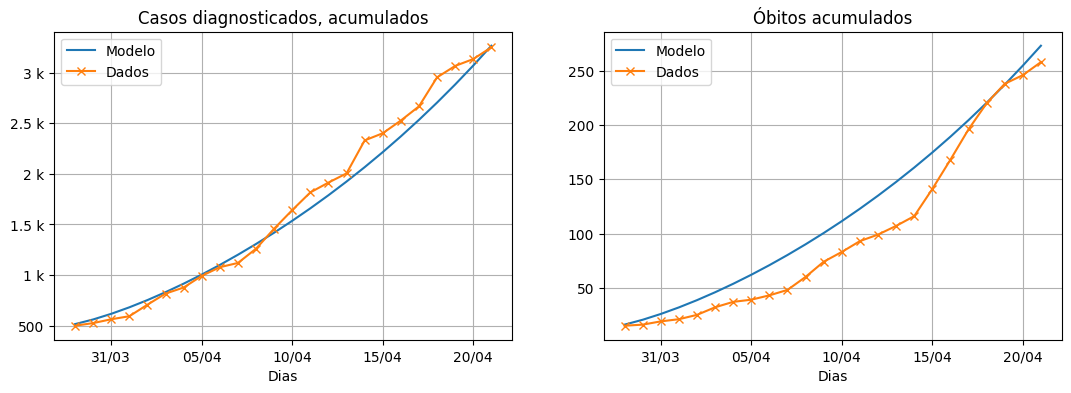

In [17]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [Rio_acc_d,Rio_acc_m]
series = [sol[9,1:24],sol[10,1:24]]
axs[1].set_title("Casos diagnosticados, acumulados")
axs[2].set_title("Óbitos acumulados")
for (ax,serie,data) in zip(axs,series,datas)
    graph_py.plot_accum(serie, data,real_data = true, ax = ax,blur = 1.0, cor_serie = "C0", cor_dados = "C1x-")
end

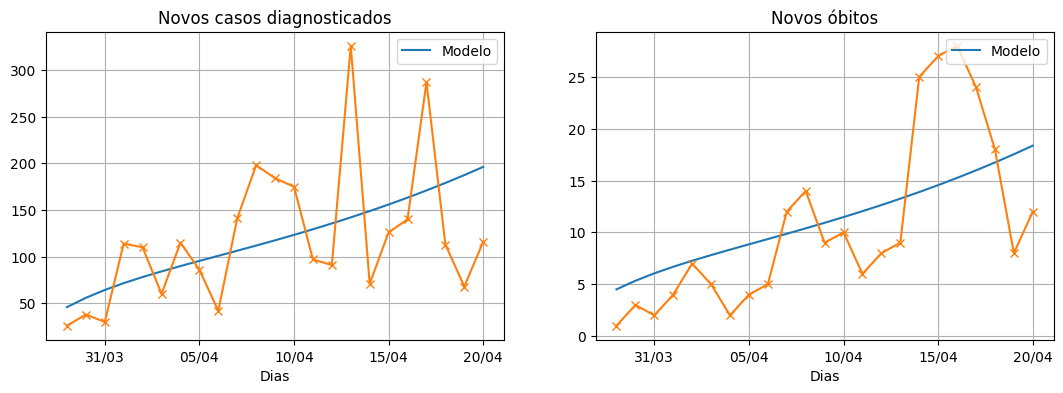

In [18]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [diagn_Rio,obitos_Rio]
series = [sol[9,1:24],sol[10,1:24]]
axs[1].set_title("Novos casos diagnosticados")
axs[2].set_title("Novos óbitos")
for (ax,serie,data) in zip(axs,series,datas)
    graph_py.plot_daily(serie, data,real_data = true, ax = ax, cor_serie = "C0", cor_dados = "C1x-")
end

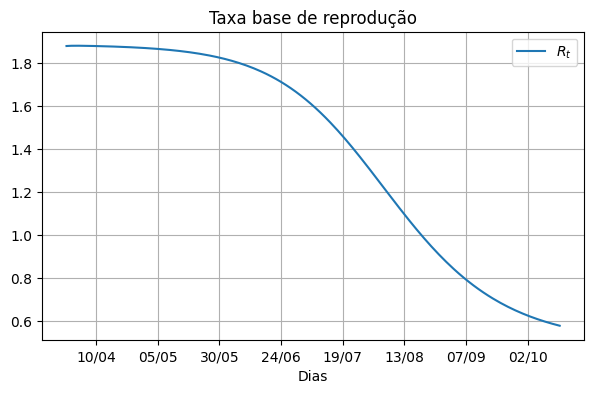

In [19]:
Ts = 0.0:1.0:200
CI_opt, p_opt = build_p_ci(res.minimizer)
sol = model(p_opt, CI_opt, Ts);
fig, ax = PyPlot.subplots(ncols=1, figsize=(7,4))
serie = Rt(sol,p_opt)
ax.set_title("Taxa base de reprodução")
graph_py.plot_accum(serie, Rio_acc_d,real_data = false, label = L"R_t", ax = ax,blur = 1.0, eng_fmt = false)

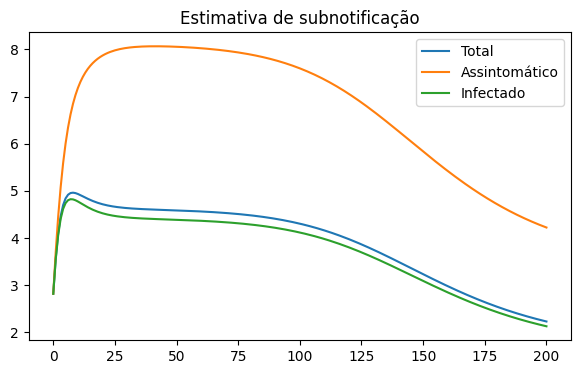

In [20]:
fig, ax = PyPlot.subplots(ncols=1, figsize=(7,4))
series_subnot = [(sol[4,:].+sol[5,:])./(sol[6,:].+sol[7,:]),(sol[4,:])./(sol[6,:]),(sol[5,:])./(sol[7,:])]
m_labels = ["Total", "Assintomático", "Infectado"]
ax.set_title("Estimativa de subnotificação")
for (serie,label) in zip(series_subnot,m_labels)
    ax.plot(serie, label = label)
end
ax.legend();

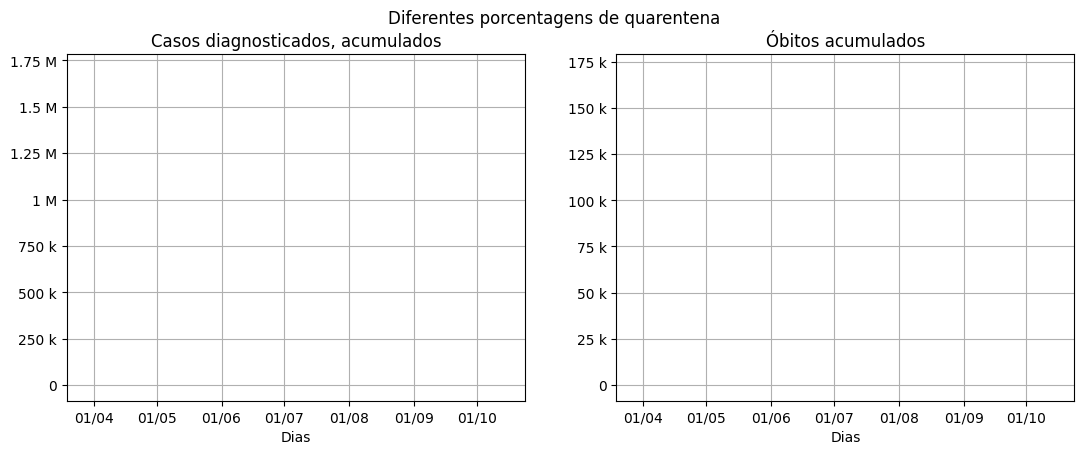

In [26]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4.5))
Ts = 0.0:1.0:200
camera = celluloid.Camera(fig)
label = true
for cut in collect(10.0:5.0:150.0)
    sols = []
    qs = collect(0.30:0.1:0.90)
    for q in qs
        p_ci_new = copy(res.minimizer)
        p_ci_new[3] = q
        CI_opt_new, p_opt_new  = build_p_ci(p_ci_new)
        CI_opt, p_opt = build_p_ci(res.minimizer)
        sol_p = piecewise_model(p_opt, CI_opt, Ts, [cut], p_opt_new);
        push!(sols,sol_p)
    end
    start = dt.datetime.strptime("29-03-2020", "%d-%m-%Y")
    cut_day = start + dt.timedelta(days=cut)
    datas = [Rio_acc_d,Rio_acc_m]
    graph_py.preliminar(ax=axs[1], pad=0.2)
    graph_py.preliminar(ax=axs[2], pad=0.2)
    plt.suptitle("Diferentes porcentagens de quarentena")
    axs[1].set_title("Casos diagnosticados, acumulados")
    axs[2].set_title("Óbitos acumulados" )
    count = 1
    for (sol,q) in zip(sols,qs)
        series = [sol[9,:],sol[10,:]]
        for (ax,serie,data) in zip(axs,series,datas)
            if label
                graph_py.plot_accum(serie, data,real_data = false, ax = ax,blur = 1.0,label = string(round(q*100))*"%", cor_serie = "C"*string(count), cut_day = cut)
            else
                graph_py.plot_accum(serie, data,real_data = false, ax = ax,blur = 1.0, cor_serie = "C"*string(count), legend = false, cut_day = cut)
            end
        end
        count += 1
    end
    label = false
    max_d = axs[1].get_ylim()
    max_o = axs[2].get_ylim()
    if cut < 40.0
        axs[1].text(x=cut_day + dt.timedelta(days=2), y = max_d[2]*0.33, s = "Dia de\nintervenção: \n" * string(cut_day)[9:10] * "/" * string(cut_day)[6:7])
        axs[2].text(x=cut_day + dt.timedelta(days=2), y = max_o[2]*0.33, s = "Dia de\nintervenção: \n" * string(cut_day)[9:10] * "/" * string(cut_day)[6:7])
    else
        axs[1].text(x=cut_day + dt.timedelta(days=2), y = max_d[2]*0.80, s = "Dia de\nintervenção: \n" * string(cut_day)[9:10] * "/" * string(cut_day)[6:7])
        axs[2].text(x=cut_day + dt.timedelta(days=2), y = max_o[2]*0.80, s = "Dia de\nintervenção: \n" * string(cut_day)[9:10] * "/" * string(cut_day)[6:7])
    end
    camera.snap()
end
animation = camera.animate()
animation.save("acao_da_quarentena.mp4", fps = 1.0, writer = "imagemagick")

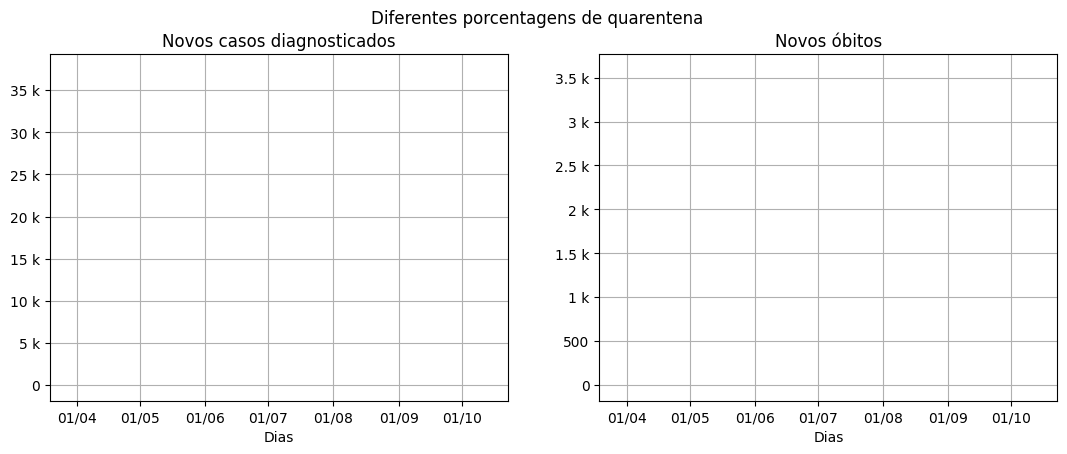

In [27]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4.5))
Ts = 0.0:1.0:200
camera = celluloid.Camera(fig)
label = true
for cut in collect(10.0:5.0:150.0)
    sols = []
    qs = collect(0.30:0.1:0.90)
    for q in qs
        p_ci_new = copy(res.minimizer)
        p_ci_new[3] = q
        CI_opt_new, p_opt_new  = build_p_ci(p_ci_new)
        CI_opt, p_opt = build_p_ci(res.minimizer)
        sol_p = piecewise_model(p_opt, CI_opt, Ts, [cut], p_opt_new);
        push!(sols,sol_p)
    end
    start = dt.datetime.strptime("29-03-2020", "%d-%m-%Y")
    cut_day = start + dt.timedelta(days=cut)
    datas = [Rio_acc_d,Rio_acc_m]
    graph_py.preliminar(ax=axs[1], pad=0.2)
    graph_py.preliminar(ax=axs[2], pad=0.2)
    plt.suptitle("Diferentes porcentagens de quarentena")
    axs[1].set_title("Novos casos diagnosticados")
    axs[2].set_title("Novos óbitos")
    count = 1
    for (sol,q) in zip(sols,qs)
        series = [sol[9,:],sol[10,:]]
        for (ax,serie,data) in zip(axs,series,datas)
            if label
                graph_py.plot_daily(serie, data,real_data = false, ax = ax,blur = 1.0,label = string(round(q*100))*"%", cor_serie = "C"*string(count), cut_day = cut)
            else
                graph_py.plot_daily(serie, data,real_data = false, ax = ax,blur = 1.0, cor_serie = "C"*string(count), legend = false, cut_day = cut)
            end
        end
        count += 1
    end
    label = false
    max_d = axs[1].get_ylim()
    max_o = axs[2].get_ylim()
    if cut < 40.0
        axs[1].text(x=cut_day + dt.timedelta(days=2), y = max_d[2]*0.80, s = "Dia de\nintervenção: \n" * string(cut_day)[9:10] * "/" * string(cut_day)[6:7])
        axs[2].text(x=cut_day + dt.timedelta(days=2), y = max_o[2]*0.80, s = "Dia de\nintervenção: \n" * string(cut_day)[9:10] * "/" * string(cut_day)[6:7])
    else
        axs[1].text(x=cut_day - dt.timedelta(days=45), y = max_d[2]*0.80, s = "Dia de\nintervenção: \n" * string(cut_day)[9:10] * "/" * string(cut_day)[6:7])
        axs[2].text(x=cut_day - dt.timedelta(days=45), y = max_o[2]*0.80, s = "Dia de\nintervenção: \n" * string(cut_day)[9:10] * "/" * string(cut_day)[6:7])
    end
    camera.snap()
end
animation = camera.animate()
animation.save("acao_da_quarentena_diario.mp4", fps = 1.0, writer = "imagemagick")